In [1]:
#Importing Libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
#Loading model
model= tf.keras.models.load_model('trained_model.Keras')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [4]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


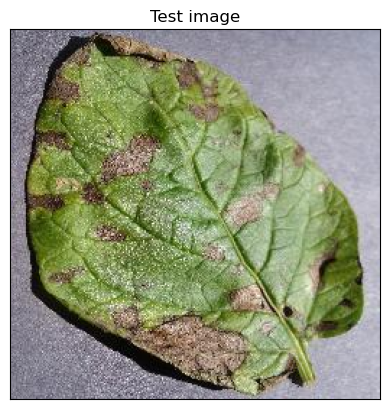

In [5]:
#visualisation single image of test set
import cv2
image_path = 'test/test/PotatoEarlyBlight1.JPG'
#Reading image 
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#Convert BGR to RGB

#Displaying image 
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
#Testing Model
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr)
print(input_arr.shape)

[[[[122. 120. 134.]
   [120. 118. 132.]
   [135. 133. 147.]
   ...
   [155. 158. 177.]
   [154. 157. 176.]
   [155. 158. 177.]]

  [[ 89.  87. 101.]
   [ 90.  88. 102.]
   [118. 116. 130.]
   ...
   [158. 161. 180.]
   [159. 162. 181.]
   [161. 164. 183.]]

  [[124. 122. 136.]
   [ 96.  94. 108.]
   [115. 113. 127.]
   ...
   [162. 165. 184.]
   [163. 166. 185.]
   [165. 168. 187.]]

  ...

  [[140. 138. 152.]
   [120. 118. 132.]
   [138. 136. 150.]
   ...
   [181. 180. 194.]
   [183. 182. 196.]
   [191. 190. 204.]]

  [[142. 140. 154.]
   [114. 112. 126.]
   [120. 118. 132.]
   ...
   [186. 185. 199.]
   [188. 187. 201.]
   [186. 185. 199.]]

  [[115. 113. 127.]
   [131. 129. 143.]
   [146. 144. 158.]
   ...
   [194. 193. 207.]
   [187. 186. 200.]
   [201. 200. 214.]]]]
(1, 128, 128, 3)


In [7]:
prediction = model.predict(input_arr)
prediction,prediction.shape


1/1 [==============================] - 1s 572ms/step


(array([[3.4925646e-13, 1.2322230e-16, 4.4431817e-16, 5.0745218e-17,
         2.2869861e-18, 2.7730890e-16, 1.4221137e-19, 2.0582416e-14,
         1.1589390e-11, 1.3443164e-18, 1.2914680e-22, 8.2604164e-19,
         2.5392970e-18, 1.2817744e-15, 4.8258476e-22, 1.5711135e-18,
         6.5873766e-14, 2.2047971e-20, 1.8131718e-11, 3.2581592e-18,
         1.0000000e+00, 1.8755349e-13, 5.3066213e-18, 2.0275603e-22,
         3.2838947e-22, 5.1101822e-19, 1.6335230e-13, 1.9182299e-20,
         3.9412881e-19, 2.0159267e-10, 1.3101496e-12, 2.8639541e-17,
         4.9763657e-12, 3.0941009e-23, 8.8308830e-19, 3.5486510e-22,
         3.5884548e-22, 5.8456874e-17]], dtype=float32),
 (1, 38))

In [8]:
result_index = np.argmax(prediction) #Return index of max element
result_index

20

In [9]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper_bell___Bacterial_spot',
 'Pepper_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

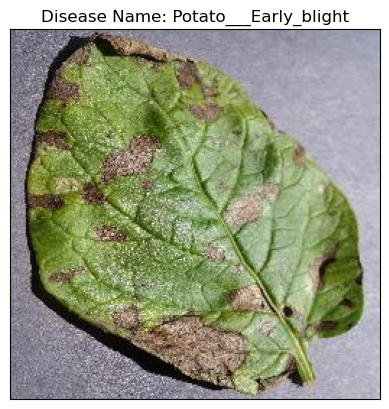

In [10]:
#Displaying Result of disease prediction
model_prediction = class_name [result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
model_prediction

'Potato___Early_blight'